# Notebook for comparison beween Non-linear Gevolution and class and agreement between class and hi-class

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
import h5py
from readgadget import *
from pygadgetreader import *
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

NUM_COLORS = 20
from matplotlib.colors import LogNorm

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
kess_nl=[]
kess_nl_source=[]

# When the scalar field is coupled to other components.
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7//space_resolution/cs2_e7_Ngrid_16_dtau_04///output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_32_dtau_04/output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/time_resolution/cs2_e7_Ngrid_64_dtau_04//output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_128_dtau_04///output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_4Feb_2020_soundspeed_1024Ngrid/Files_Baobab_blowup_CSCS_4Feb2020_SoundSpeed_1024Ngrid/full_equation/cs2_e7_Ngrid_1024_dtau_04_full///output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/CSCS_Blowup_runs_18Feb2020/Blowup_runs_data_18Feb2020/cs2_e7_Ngrid_2048_dtau_04_full////output/snapshots.txt'))

# When field is solved independently
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_16_dtau_04///output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_32_dtau_04////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_64_dtau_04////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_128_dtau_04////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_4Feb_2020_soundspeed_1024Ngrid/Files_Baobab_blowup_CSCS_4Feb2020_SoundSpeed_1024Ngrid/solo_equation/cs2_e7_Ngrid_1024_dtau_04_solo////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/CSCS_11Feb2020/Baobab_Blowup_Newfiles_12Feb2020/Runs_series1_Highresolution/cs2_e7_Ngrid_2048_dtau_04_solo/////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/CSCS_11Feb2020/Baobab_Blowup_Newfiles_12Feb2020/Runs_series1_Highresolution/cs2_e7_Ngrid_3600_dtau_04_solo///////output/snapshots.txt'))




IOError: [Errno 2] No such file or directory: './../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7//space_resolution/cs2_e7_Ngrid_16_dtau_04///output/snapshots.txt'

In [3]:
# kess_nl[0][-1:,4]
# kess_nl[1][-1:,4]
# kess_nl[2][-1:,4]
# kess_nl[3][-1:,4]

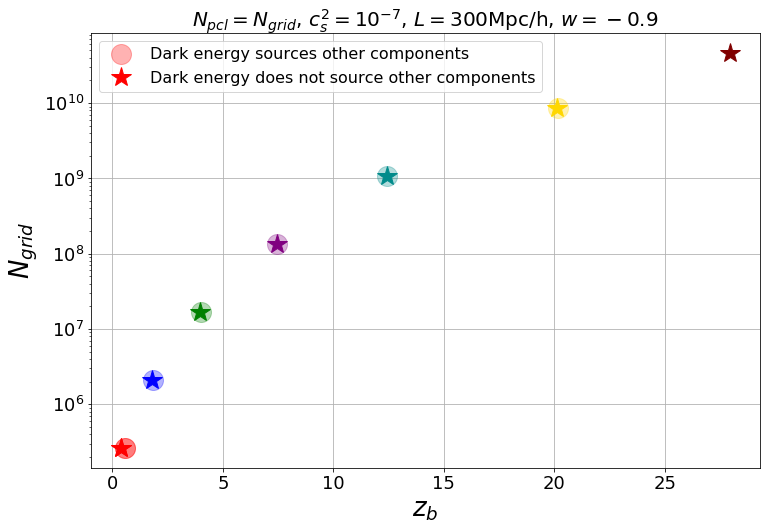

In [4]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3,3600**3]
Ngrid_full = [64**3,128**3,256**3,512**3,1024**3,2048**3]
plt.figure(figsize=(12,8))

for i in range(6):
    if (i==0):
        plt.semilogy(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.semilogy(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        plt.semilogy(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.semilogy(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i])

#     plt.legend()
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$N_{grid}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
plt.grid(True)

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.savefig("spatial_resolution_v1.pdf")

plt.show()

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


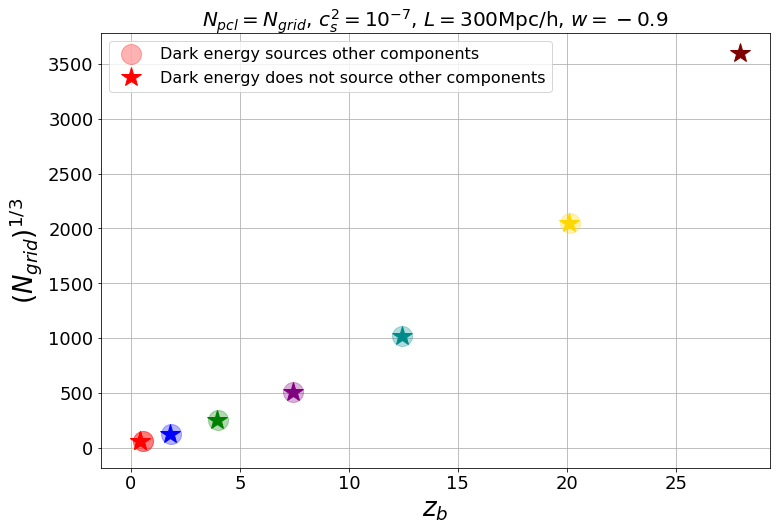

In [5]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))
Ngrid = np.arange(0,30)
const = 1./8;
for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i])
plt.plot(const * np.sqrt(2.0 * np.log(Ngrid)) ,Ngrid,"--",markersize=20,alpha =0.3,color=ColorsI[i]) # 1 + z = 1/8 sigma_R \sqrt{2 ln Ngrid}

for i in range(7):
    if (i==0):
        plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i])
#     plt.legend()
# #     plt.ylim(1.e-8,1.e-2)

plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{1/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v2.pdf")

plt.show()

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


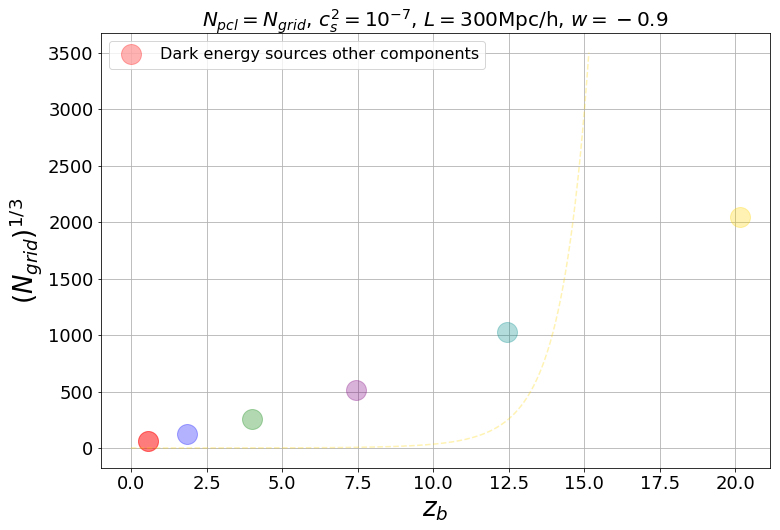

In [16]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))
Ngrid = np.arange(0,3500)
const = 30./8;
for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i])
plt.plot((const/Ngrid**(1/3)) * np.sqrt(2.0 * np.log(Ngrid)) ,Ngrid,"--",markersize=20,alpha =0.3,color=ColorsI[i]) # 1 + z = 1/8 sigma_R \sqrt{2 ln Ngrid}

# for i in range(7):
#     if (i==0):
#         plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
# #     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
#     plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i])
# #     plt.legend()
# # #     plt.ylim(1.e-8,1.e-2)

plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{1/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v2.pdf")

plt.show()

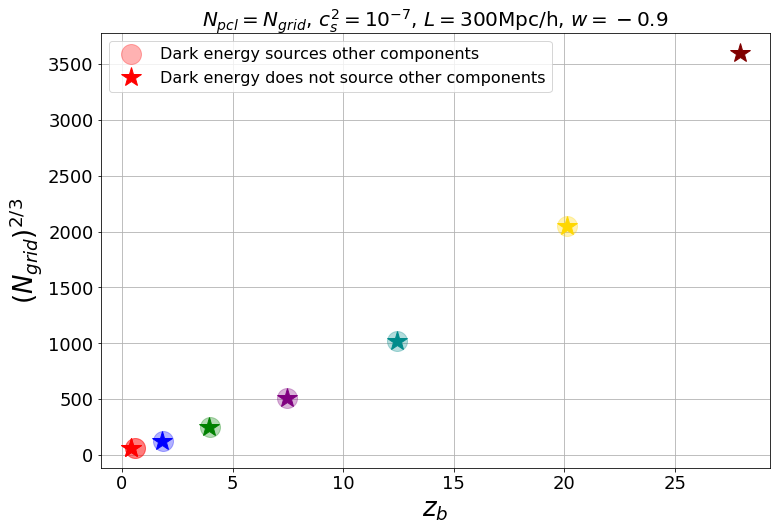

In [7]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))

mm=1
for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i]**(mm),"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i]**(mm),"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i]**(mm),"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i]**(mm),"*",markersize=20,alpha =1,color=ColorsI[i])
#     plt.legend()
# z = np.arange(0,30,0.1)
# plt.plot (z, z**2 * best_vals[0] + best_vals[1] * z +  best_vals[2])
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{2/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v3.pdf")

plt.show()

In [1]:
data = np.zeros((7,2))
for i in range(7):
    data[i,0] = Ngrid_solo[i]; 
    data[i,1] = 1./(kess_nl[i][-1:,2])-1

from scipy.optimize import curve_fit
def func(x, alpha, beta):
    return alpha *x  +beta
x = data[:,0]**(2./3.)
y = 1+data[:,1]
init_vals = [1, 1]  
best_vals, covar = curve_fit(func, x, y, p0=init_vals)

NameError: name 'np' is not defined

In [12]:
best_vals

array([ 0.12693741, -0.08120497])

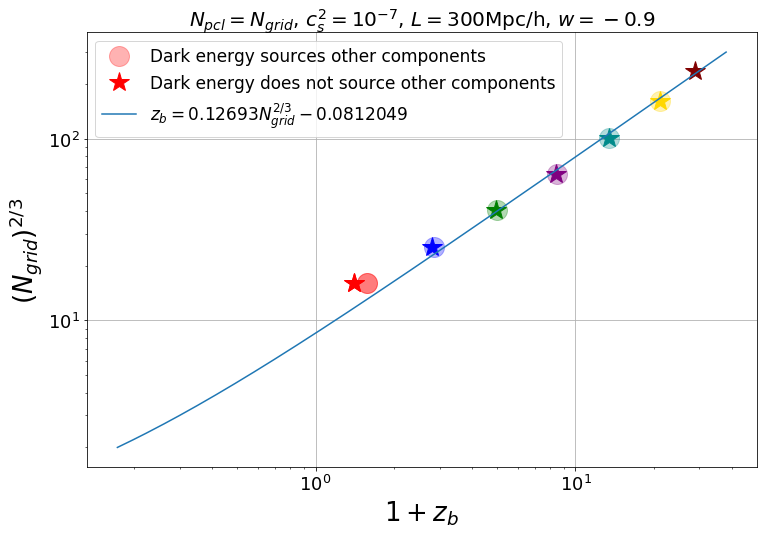

In [22]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))

mm=2./3.
for i in range(6):
    if (i==0):
        x = 1./(kess_nl_source[i][-1:,2])
        y = Ngrid_full[i]**(mm)
        plt.plot( x,y,"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    y = Ngrid_full[i]**(mm)
    x = 1./(kess_nl_source[i][-1:,2])
    plt.plot(x,y ,"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        y = Ngrid_solo[i]**(mm)
        x = 1./(kess_nl[i][-1:,2])
        plt.plot(x,y ,"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    x = 1./(kess_nl[i][-1:,2])
    y = Ngrid_solo[i]**(mm)
    plt.plot(x,y ,"*",markersize=20,alpha =1,color=ColorsI[i])
#     plt.legend()
z = np.arange(2,300,0.1)

plt.plot (z * best_vals[0] + best_vals[1],z  ,markersize=20, label = r"$z_b = 0.12693 N_{grid}^{2/3}  -0.0812049 $" )
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$1+z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{2/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v3.pdf")

plt.show()

In [10]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$"]
# plt.figure(figsize=(16,10))


# for i in range(2,4):
#     plt.loglog(kess_nl[i][:,4],np.abs(kess_nl[i][:,1]),"-.",lw=3,color=ColorsI[i],label=r"$|<\mathcal{H}\pi>|$, Ngrid= "+data[i])
# for i in range(2,4):
#     plt.loglog(kess_nl[i][:,4],np.abs(kess_nl[i][:,2]),"-.",lw=3,color=ColorsI[i+1],label=r"$|<\zeta>|$, Ngrid= "+data[i])
# for i in range(2,4):
#     plt.loglog(kess_nl[i][:,4],np.abs(kess_nl[i][:,3]),"-.",lw=3,color=ColorsI[i+2],label=r"$|<\Phi>|$, Ngrid= "+data[i])
    
# plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,1]),"-",lw=3,color="blue",label=r"only-field, $|<\mathcal{H}\pi>|$, Ngrid=512 ")
# plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,2]),"-",lw=3,color="red",label=r"only-field, $|<\zeta>|$, Ngrid=512 ")
# # plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,3]),":",lw=3,color="green",label=r"only-field, $|<\phi>|$, Ngrid=512 ")
# plt.loglog(kess_nl_eom[1][:,4],np.abs(kess_nl_eom[1][:,1]),"-.",lw=3,color="black",label=r"only-field, $|<\mathcal{H}\pi>|$, Ngrid=256 ")
# plt.loglog(kess_nl_eom[1][:,4],np.abs(kess_nl_eom[1][:,2]),"-.",lw=3,color="magenta",label=r"only-field, $|<\zeta>|$, Ngrid=256 ")

    
# # # plt.loglog(class_file[:,0],(power[:]),color="green")
# #     plt.legend()
# # #     plt.ylim(1.e-8,1.e-2)
# plt.xlabel("z",fontsize=26)
# plt.title(r"$c_s^2=10^{-7}$ - non-linear", fontsize=20)
# # plt.ylabel(r"$<...>$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)

# plt.legend(fontsize=12)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
# plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.show()


In [11]:
# kess_max=[]
# kess_max.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7//space_resolution/cs2_e7_Ngrid_16_dtau_04///output/Results_max.txt'))
# kess_max.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_32_dtau_04/output/Results_max.txt'))
# kess_max.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/time_resolution/cs2_e7_Ngrid_64_dtau_04//output/Results_max.txt'))
# kess_max.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_128_dtau_04///output/Results_max.txt'))

# kess_max_nl_eom=[]
# # kess_nl_eom.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_16_dtau_04//////output/Result_avg.txt'))
# # kess_nl_eom.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_32_dtau_04////output/Result_avg.txt'))
# # kess_nl_eom.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_64_dtau_04///////output/Result_avg.txt'))
# kess_max_nl_eom.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_128_dtau_04/////output/Results_max.txt'))
# kess_max_nl_eom.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_64_dtau_04///////output/Results_max.txt'))


In [12]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$"]
# plt.figure(figsize=(16,10))


# for i in range(4):
#     plt.loglog(kess_max[i][:,4],np.abs(kess_max[i][:,1]),"-.",lw=3,color=ColorsI[i],label=r"Max $\pi$, Ngrid= "+data[i])
# for i in range(4):
#     plt.loglog(kess_max[i][:,4],np.abs(kess_max[i][:,2]),"-",lw=3,color=ColorsI[i+4],label=r"Max $\zeta$, Ngrid= "+data[i])
# for i in range(4):
#     plt.loglog(kess_max[i][:,4],np.abs(kess_max[i][:,3]),"-",lw=3,color=ColorsI[i+8],label=r"$\Phi$, Ngrid= "+data[i])
    
# # plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,1]),"-",lw=3,color="blue",label=r"only-field, Max $\pi$, Ngrid=512 ")
# # plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,2]),"-",lw=3,color="red",label=r"only-field, Max $\zeta$, Ngrid=512 ")
# # # plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,3]),":",lw=3,color="green",label=r"only-field, $|<\phi>|$, Ngrid=512 ")
# # plt.loglog(kess_nl_eom[1][:,4],np.abs(kess_nl_eom[1][:,1]),"-.",lw=3,color="black",label=r"only-field, Max $\pi$, Ngrid=256 ")
# # plt.loglog(kess_nl_eom[1][:,4],np.abs(kess_nl_eom[1][:,2]),"-.",lw=3,color="magenta",label=r"only-field, Max $\zeta$, Ngrid=256 ")

# # # plt.loglog(class_file[:,0],(power[:]),color="green")
# #     plt.legend()
# # #     plt.ylim(1.e-8,1.e-2)
# plt.xlabel("z",fontsize=26)
# plt.title(r"$c_s^2=10^{-7}$ - non-linear", fontsize=20)
# # plt.ylabel(r"$<...>$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)

# plt.legend(fontsize=12)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
# plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.show()

In [13]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$"]
# plt.figure(figsize=(16,10))


# for i in range(2,4):
#     plt.loglog(kess_max[i][:,4],np.abs(kess_max[i][:,1]),"-.",lw=3,color=ColorsI[i],label=r"Max $\pi$, Ngrid= "+data[i])
# for i in range(2,4):
#     plt.loglog(kess_max[i][:,4],np.abs(kess_max[i][:,2]),"-",lw=3,color=ColorsI[i+4],label=r"Max $\zeta$, Ngrid= "+data[i])
# for i in range(2,4):
#     plt.loglog(kess_max[i][:,4],np.abs(kess_max[i][:,3]),"-",lw=3,color=ColorsI[i+8],label=r"$\Phi$, Ngrid= "+data[i])
    
# plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,1]),"-",lw=3,color="blue",label=r"only-field, Max $\pi$, Ngrid=512 ")
# plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,2]),"-",lw=3,color="red",label=r"only-field, Max $\zeta$, Ngrid=512 ")
# # plt.loglog(kess_nl_eom[0][:,4],np.abs(kess_nl_eom[0][:,3]),":",lw=3,color="green",label=r"only-field, $|<\phi>|$, Ngrid=512 ")
# plt.loglog(kess_nl_eom[1][:,4],np.abs(kess_nl_eom[1][:,1]),"-.",lw=3,color="black",label=r"only-field, Max $\pi$, Ngrid=256 ")
# plt.loglog(kess_nl_eom[1][:,4],np.abs(kess_nl_eom[1][:,2]),"-.",lw=3,color="magenta",label=r"only-field, Max $\zeta$, Ngrid=256 ")

# # # plt.loglog(class_file[:,0],(power[:]),color="green")
# #     plt.legend()
# # #     plt.ylim(1.e-8,1.e-2)
# plt.xlabel("z",fontsize=26)
# plt.title(r"$c_s^2=10^{-7}$ - non-linear", fontsize=20)
# # plt.ylabel(r"$<...>$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)

# plt.legend(fontsize=12)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
# plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.show()

In [14]:
# #Snapshot count for blowup time
# kess_time=[]
# kess_time.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7//space_resolution/cs2_e7_Ngrid_16_dtau_04///output/snapshots.txt'))
# kess_time.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_32_dtau_04/output/snapshots.txt'))
# kess_time.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/time_resolution/cs2_e7_Ngrid_64_dtau_04//output/snapshots.txt'))
# kess_time.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_128_dtau_04///output/snapshots.txt'))


In [47]:
# # Here I wanted to plot z_blowup as a function of resolution which apparently the data for it has an inconsistency that I have to solve!

# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$"]
# data_reso= [64,128,256,512]
# kess_redshift = [kess_time[0][0,1],kess_time[1][0,1],kess_time[2][0,1],kess_time[3][0,1]]
# plt.figure(figsize=(16,10))

# # for i in range(4):
# plt.plot(kess_redshift,data_reso,"-o",lw=3,color=ColorsI[i],label=r"$|<\mathcal{H}\pi>|$, Ngrid= "+data[i])
# # for i in range(4):
# #     plt.loglog(data_reso[i],np.abs(kess_time[i][:,2]),"-.",lw=3,color=ColorsI[i+4],label=r"$|<\zeta>|$, Ngrid= "+data[i])
# # for i in range(4):
# #     plt.loglog(data_reso[i],np.abs(kess_time[i][:,3]),"-.",lw=3,color=ColorsI[i+8],label=r"$|<\Phi>|$, Ngrid= "+data[i])
    
# # # plt.loglog(class_file[:,0],(power[:]),color="green")
# #     plt.legend()
# # #     plt.ylim(1.e-8,1.e-2)
# plt.xlabel("z",fontsize=26)
# plt.title(r"$c_s^2=10^{-7}$ - non-linear", fontsize=20)
# # plt.ylabel(r"$<...>$",fontsize=26)
# # plt.ylim(1.e-15,1.e-1)

# plt.legend(fontsize=12)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
# plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.show()

# Power spectra

In [15]:
# power_pi_512 =[]
# power_pi_256 =[]
# power_zeta_512=[]
# power_zeta_256=[]

# z_range= [100,50,20,6,1,0]
# for i in range(4):
#     power_pi_512.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7//space_resolution/cs2_e7_Ngrid_16_dtau_04///output/kess_pk_cs_0_00'+str(i)+'_pi_k.dat'))
#     power_pi_256.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/time_resolution/cs2_e7_Ngrid_64_dtau_04//output/kess_pk_cs_0_00'+str(i)+'_pi_k.dat'))
# for i in range(4):
#     power_zeta_512.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7//space_resolution/cs2_e7_Ngrid_16_dtau_04///output/kess_pk_cs_0_00'+str(i)+'_zeta.dat'))
#     power_zeta_256.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e7/time_resolution/cs2_e7_Ngrid_64_dtau_04//output/kess_pk_cs_0_00'+str(i)+'_zeta.dat'))


# # pow_lin_z0=[]
# # pow_lin_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/linear/cs2_e4_dx_16/output/kess_pk_cs_0_001_pi_k.dat'))
# # pow_lin_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/linear/cs2_e4_dx_32/output/kess_pk_cs_0_001_pi_k.dat'))
# # pow_lin_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/linear/cs2_e4_dx_128//output/kess_pk_cs_0_001_pi_k.dat'))
# # pow_lin_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/linear/cs2_e4_dx_16/output/kess_pk_cs_0_001_zeta.dat'))
# # pow_lin_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/linear/cs2_e4_dx_32/output/kess_pk_cs_0_001_zeta.dat'))
# # pow_lin_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/linear/cs2_e4_dx_128//output/kess_pk_cs_0_001_zeta.dat'))



# # pow_nl_z100 =[]
# # pow_nl_z100.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear//cs2_e4_dx_16/output/kess_pk_cs_0_000_pi_k.dat'))
# # pow_nl_z100.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_32/output/kess_pk_cs_0_000_pi_k.dat'))
# # pow_nl_z100.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_128//output/kess_pk_cs_0_000_pi_k.dat'))
# # pow_nl_z100.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear//cs2_e4_dx_16/output/kess_pk_cs_0_000_zeta.dat'))
# # pow_nl_z100.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_32/output/kess_pk_cs_0_000_zeta.dat'))
# # pow_nl_z100.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_128//output/kess_pk_cs_0_000_zeta.dat'))


# # pow_nl_z0=[]
# # pow_nl_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_16/output/kess_pk_cs_0_001_pi_k.dat'))
# # pow_nl_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_32/output/kess_pk_cs_0_001_pi_k.dat'))
# # pow_nl_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_128//output/kess_pk_cs_0_001_pi_k.dat'))
# # pow_nl_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_16/output/kess_pk_cs_0_001_zeta.dat'))
# # pow_nl_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_32/output/kess_pk_cs_0_001_zeta.dat'))
# # pow_nl_z0.append(np.loadtxt('./Simulations_CSCS/Runs_27Jan_2020/cs2_e4/space_resolution/non_linear/cs2_e4_dx_128//output/kess_pk_cs_0_001_zeta.dat'))




In [16]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$64^3$",r"$128^3$",r"$256^3$"]
# plt.figure(figsize=(16,10))

# for i in range(4):
# #     plt.loglog(kess_linear[i][:,4],kess_linear[i][:,1],label=r"$<\mathcal{H}\pi>$, linear, Ngrid= "+data[i])
#     plt.loglog(power_pi_512[i][:,0],power_pi_512[i][:,1],"-.",lw=3,label=r"z=100, Ngrid= 512, z= "+str(z_range[i]))
# for i in range(4):
# #     plt.loglog(kess_linear[i][:,4],kess_linear[i][:,1],label=r"$<\mathcal{H}\pi>$, linear, Ngrid= "+data[i])
#     plt.loglog(power_pi_256[i][:,0],power_pi_256[i][:,1],"-",lw=3,label=r"z=100, Ngrid= 256, z= "+str(z_range[i]))#     plt.legend()
# plt.ylim(1.e-22,1.e-10)
# plt.xlabel("k[h/Mpc]",fontsize=26)
# plt.title(r"$c_s^2=10^{-7}$ - non-Linear", fontsize=20)
# plt.ylabel(r"$\mathcal{P}_{\pi}$",fontsize=26)
# plt.legend(fontsize=20)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
# plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.show()

In [17]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$64^3$",r"$128^3$",r"$256^3$"]
# plt.figure(figsize=(16,10))

# for i in range(4):
# #     plt.loglog(kess_linear[i][:,4],kess_linear[i][:,1],label=r"$<\mathcal{H}\pi>$, linear, Ngrid= "+data[i])
#     plt.loglog(power_zeta_512[i][:,0],power_zeta_512[i][:,1],"-.",lw=3,label=r"z=100, Ngrid= 512, z= "+str(z_range[i]))
# for i in range(4):
# #     plt.loglog(kess_linear[i][:,4],kess_linear[i][:,1],label=r"$<\mathcal{H}\pi>$, linear, Ngrid= "+data[i])
#     plt.loglog(power_zeta_256[i][:,0],power_zeta_256[i][:,1],"-",lw=3,label=r"z=100, Ngrid= 256, z= "+str(z_range[i]))#     plt.legend()
# plt.ylim(1.e-18,1.e-13)
# plt.xlabel("k[h/Mpc]",fontsize=26)
# plt.title(r"$c_s^2=10^{-7}$ - non-Linear", fontsize=20)
# plt.ylabel(r"$\mathcal{P}_{\zeta}$",fontsize=26)
# plt.legend(fontsize=20)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
# plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.show()